In [1]:
"""
Name: con_contact_tracing.ipynb
Authors: Stephan Meighen-Berger
Checks the efficiency of contact tracing
"""

'\nName: con_contact_tracing.ipynb\nAuthors: Stephan Meighen-Berger\nChecks the efficiency of contact tracing\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# Module imports
from contagion import CONTAGION
from con_config import config

In [6]:
# Creating a fourth_day object
infected=10
mean_interactions_arr = 1
tracking_fractions = [0., 0.2, 0.4, 0.6]
results = []
results_infected = []
for tracked_fraction in tqdm(tracking_fractions):
    config['measures'] = 'contact tracing'
    config['tracked'] = tracked_fraction
    contagion = CONTAGION(infected, config=config)
    # Storing the solutions
    contagion.sim()
    results.append(contagion.mc_run.new_infections)
    results_infected.append(contagion.mc_run.infections)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:11<00:00, 32.95s/it]


In [7]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

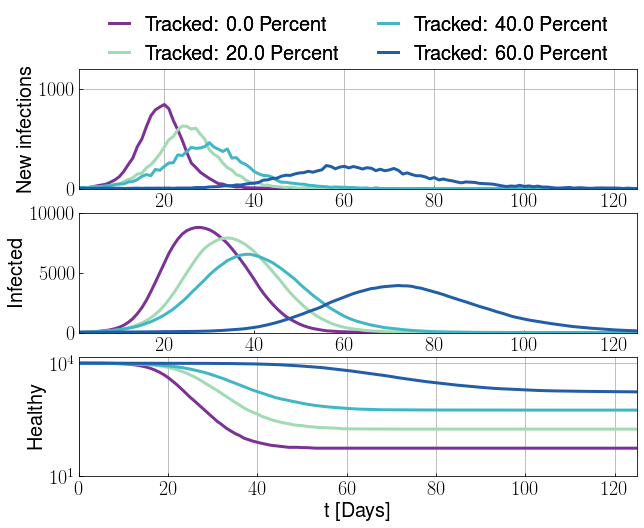

In [29]:
# Infections per time step
figure, (ax1, ax2, ax3) = plt.subplots(3, 1 ,figsize=(std_size, std_size * 6. / 8.))
colors = [
    '#7b3294',
    '#a1dab4',
    '#41b6c4',
    '#225ea8']
high_x = 125
#  New infections
for i, tracked_fraction in enumerate(tracking_fractions):
    ax1.plot(contagion.t, results[i], color=colors[i],
            lw=lw, label='Tracked: %.1f Percent' %(tracked_fraction*100.))
ax1.set_xlim(1e0, high_x)
ax1.set_ylim(0., 1200)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
# ax1.set_xlabel(r't [Days]', fontsize=fontsize)
ax1.set_ylabel(r'New infections', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.6),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.grid(True)
# Infection total
for i, tracked_fraction in enumerate(tracking_fractions):
    ax2.plot(contagion.t, results_infected[i], color=colors[i],
            lw=lw)
ax2.set_xlim(1e0, high_x)
ax2.set_ylim(0., 10000)
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_xlabel(r't [Days]', fontsize=fontsize)
ax2.set_ylabel(r'Infected', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# Healthy
for i, tracked_fraction in enumerate(tracking_fractions):
    ax3.plot(contagion.t,
             config['population size'] - np.cumsum(results[i]),
             lw=lw, color=colors[i],)
ax3.set_xlim(0., high_x)
ax3.set_ylim(1e1, 1.5e4)
ax3.set_xscale('linear')
ax3.set_yscale('log')
ax3.set_xlabel(r't [Days]', fontsize=fontsize)
ax3.set_ylabel(r'Healthy', fontsize=fontsize)
ax3.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax3.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax3.grid(True)
plt.show()

In [30]:
figure.savefig("C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Corona\\Contagion_Contact_Tracing.png",
               bbox_inches='tight')

In [31]:
contagion.R

2.0